In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>")) #$\color{red}{\text{ciao}}$

![title](img/fig_intro.png)

# Python para Finanzas y Ciencia de Datos
____

# Módulo 4
#### Profesor: Jonatan Saúl

1. Statistics Concepts
2. Portfolio Optimization
3. Principal Component Analysis (PCA)
4. Value-at-Risk (VaR)
____

In [2]:
# IMPORTAMOS LAS LIBRERÍAS QUE VAMOS A USAR A LO LARGO DEL MÓDULO.
import numpy as np
import pandas as pd

from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from numpy.random import multivariate_normal
import yfinance as yf

import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy.stats import gaussian_kde

import statsmodels.api as sm

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import seaborn as sns

#import functions as f 

import random
random.seed(1000)


# Some important statistics concepts

### Random variables and probability functions

A **random variable** is a function that maps the outcomes of random phenomena to a unique numerical value.

A random variable can be **discrete** or **continuous**.  
+ A discrete random variable $X$ has a countable number of possible values, e.g: rolling a dice. 
+ A continuous random variable $X$ takes all values in a given interval of numbers, e.g: the returns of a risky asset.

The function that relates outcomes to their probabilities in continuous random variables is called **probability density function (PDF)**.

The **distribution function** shows the probability of receiving an outcome or a lower one, that is, it shows the cumulative probabilities.

Let $X$ be a random variable, $q$ certain realization of that random variable, $f(x)$ the probability density function and $F(x)$ the distribution probability, then the probability that $X \leq q$ is:

$$ F(q) = \int_{-\infty}^{q}f(x)dx$$


<h4 align="center"> Density function and Boxplot </h4>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png' width="40%" align="center"/>

### Moments of a random variable

**Expectation**

In probability theory, the expected value of a random variable $X$, $E(X)$ or $E[X]$, is a generalization of the weighted average, and is intuitively the arithmetic mean of a large number of independent realizations of $X$.

The expectation of $X$, $\mu$, is the expected value or mean of the variable. It is defined by:

$$\mu_x = E(X) = \int_{-\infty}^{\infty}x f(x) dx$$

or
$$ \mu_x=\sum_{i=1}^{N}X_i Pr(X_i)$$
in the discrete case. 



**Variance**

The variance of $X$ measures the spread of the variable around its mean. It is defined by:

$$\sigma^2_x = E \left[ (X - \mu)^2\right] = \int_{-\infty}^{\infty}(x - \mu)^2 f(x) dx$$

And the discrete case:
$$ \sigma^2_x = \sum_{i=1}^{N}(X_i-\mu)^2 Pr(X_i) $$




#### Higher order moments:

The *k-th* moment of a random variable $X$ is defined by:
$$m_k' = E(X^k)= \int_{-\infty}^\infty x^k\,f(x)\,\mathrm{d}x $$

and the *k-th* centered moment of a random variable is defined by:
$$m_k = E\left[ (X - \mu) ^k \right] = \int_{-\infty}^\infty (x - \mu)^k\,f(x)\,\mathrm{d}x$$

Note that the first moment is the mean and the second centered moment is the variance.

**Skewness** and **Kurtosis** are functions of the third and fourth moments.


**Skewness**:
It is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). 

$$ \gamma = \frac{m_3}{\sigma^3} =  \frac{\int_{-\infty}^\infty (x - \mu)^3\,f(x)\,\mathrm{d}x}{\left[\int_{-\infty}^\infty (x - \mu)^2\,f(x)\,\mathrm{d}x\right]^{\frac{3}{2}}}$$

where $ m_{3}$ third centered moment.

The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. 
As a general rule of thumb:

 - If $\gamma $ is less than -1 or greater than 1, the distribution is highly skewed.
 - If $\gamma $ is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
 - If $\gamma $ is between -0.5 and 0.5, the distribution is approximately symmetric.

<img src='https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png' width="60%"/>


**Kurtosis**: 
This statistic tells you the height and sharpness of the central peak, relative to that of a standard bell curve.

$$ \beta = \frac{m_4}{\sigma^4} =  \frac{\int_{-\infty}^\infty (x - \mu)^4\,f(x)\,\mathrm{d}x}{\left[\int_{-\infty}^\infty (x - \mu)^2\,f(x)\,\mathrm{d}x\right]^{2}}$$


 - If the $\beta$ equals 3, the distribution is normal (mesokurtic).
 - If the $\beta$ is less than 3, the distribution is platykurtic.
 - If the $\beta$ is greater than 3, the distribution is leptokurtic.

<img src='https://cdn-images-1.medium.com/max/1600/1*Nqu07THa7APRTOF7kaVr5Q.jpeg' width='40%'/>



### Sample moments

When we collect date to study a random variable, what we got is the realization of that variable for each moment or individual. The true parameters of the variable in the population are unknown so we have to estimate them using the collected data: the sample.


#### Sample Mean:
$$\hat{\mu} = \dfrac{1}{n} \sum_{i=1}^nX_i$$

#### Sample Variance:

If $\mu$ is known, we can compute the sample variance by:

$$\hat{\sigma}^2= \dfrac{1}{N}\sum_{i=1}^N (x_i - \mu)^2$$

In the more realistic case, in which $\mu$ is unknown we have to use the sample mean and adjust the formula in order to find the unbiased estimator for $\sigma^2$:

$$\hat{\sigma}^2= \dfrac{1}{N-1}\sum_{i=1}^N (x_i - \hat{\mu})^2$$

#### Sample Standard Deviation:
$$\hat{\sigma} = \sqrt{\hat{\sigma}^2}$$


#### Sample Skewness:
$$ \hat{\gamma} = \frac{\sum_{i=1}^{N}(X_i-\hat{\mu})^3}{N\hat{\sigma}^3}$$

#### Sample Kurtosis:
$$ \hat{\beta} = \frac{\sum_{i=1}^{N}(X_i-\hat{\mu})^4}{N\hat{\sigma}^4}$$


#### Normal distribution
The normal distribution is the most commonly used distribution mainly beacuse is more convenient to work with than most other distributions, and it is completely described by the first and second moments.

$X$ is normally distributed if it has the density:

$$ f(x; \mu, \sigma) = \dfrac{1}{\sqrt{2\pi}\sigma} \exp \left[ - \dfrac{1}{2} \left( \dfrac{x - \mu}{\sigma}\right)^2\right]$$

and we write $X \sim N (\mu , \sigma^2)$.

The normal distribution is unimiodal, symmetric and centered on $\mu$. The variance, $\sigma^2$, governs the dispertion of the distribution.

<h4 align="center"> Probability density function </h4>
<img src='https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg' width="50%" align="center"/>

<h4 align="center"> Cumulative distribution function </h4>
<img src='https://upload.wikimedia.org/wikipedia/commons/c/ca/Normal_Distribution_CDF.svg' width="50%" align="center"/>



**Standard normal distribution**: Is the name given to the normal distribution with mean zero and unit variance, that is: $X \sim N (0,1) $.


#### Other distributions:
 - Student's $t$-distribution
 - Uniform distribution
 - Chi-square distribution
 
We can make use of numpy.random to simulate each type of random variable and see how their distributions look like.

https://www.w3schools.com/python/numpy_random.asp

In [3]:
# Standard Normal
norm = np.random.standard_normal(10000)
print('-'*100)
print('Simulating Standard Normal Variable')
print(type(norm))
print(np.shape(norm))
print('-'*100)

----------------------------------------------------------------------------------------------------
Simulating Standard Normal Variable
<class 'numpy.ndarray'>
(10000,)
----------------------------------------------------------------------------------------------------


In [4]:
norm

array([ 0.94254726,  0.49737111, -0.52552649, ..., -0.06642511,
        0.44261219,  1.13374693])

In [5]:
# Student t
t = np.random.standard_t(5,10000)

#Uniform
unif = np.random.uniform(-1,1,10000)

#Chi square
chi = np.random.chisquare(2, 10000)

We have generated 10000 observations of each random variable.

Each distribution has some **parameters** that define it. For instance, 
+ the normal distribution is defined by its mean and variance, 
+ the Student's t and Chi square distributions are defined by their degree of freedom, and 
+ the uniform distribution is defined by its minimum and maximum values.

The process of generating these many observations is known as **Monte Carlo simulations**. Let's see how these variables look like.

We can use gaussian_kde (kernel density estimation) to estimate the probability density function

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

In [6]:
norm_density = gaussian_kde(norm) #

https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [7]:
xn = np.linspace(min(norm), max(norm)) #

In [8]:
xn

array([-3.43241012, -3.25813418, -3.08385824, -2.90958229, -2.73530635,
       -2.56103041, -2.38675447, -2.21247852, -2.03820258, -1.86392664,
       -1.6896507 , -1.51537476, -1.34109881, -1.16682287, -0.99254693,
       -0.81827099, -0.64399504, -0.4697191 , -0.29544316, -0.12116722,
        0.05310873,  0.22738467,  0.40166061,  0.57593655,  0.7502125 ,
        0.92448844,  1.09876438,  1.27304032,  1.44731626,  1.62159221,
        1.79586815,  1.97014409,  2.14442003,  2.31869598,  2.49297192,
        2.66724786,  2.8415238 ,  3.01579975,  3.19007569,  3.36435163,
        3.53862757,  3.71290351,  3.88717946,  4.0614554 ,  4.23573134,
        4.41000728,  4.58428323,  4.75855917,  4.93283511,  5.10711105])

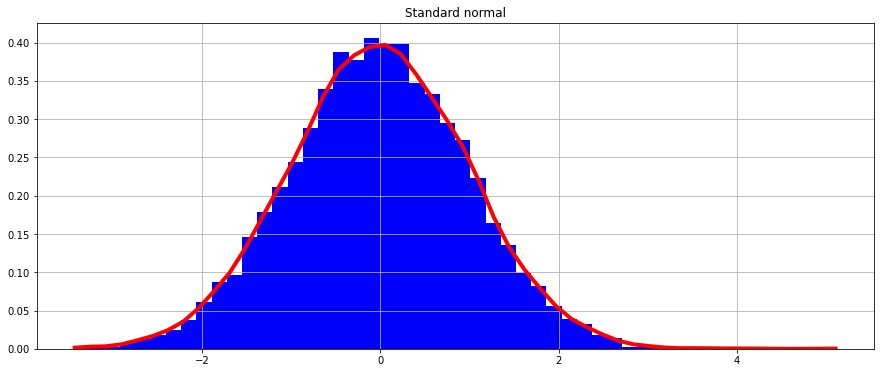

In [9]:
fig = plt.figure(figsize = (15,6))

plt.hist(norm, color = 'blue', bins = 50, density = True, alpha = 1.0)
plt.plot(xn, norm_density(xn), color = 'red', lw=4)
plt.title('Standard normal')
plt.grid(True)

In [10]:
# More variables...

t_density = gaussian_kde(t)
xt = np.linspace(min(t), max(t))

unif_density = gaussian_kde(unif)
xu = np.linspace(min(unif), max(unif))

chi_density = gaussian_kde(chi)
xch= np.linspace(min(chi), max(chi))

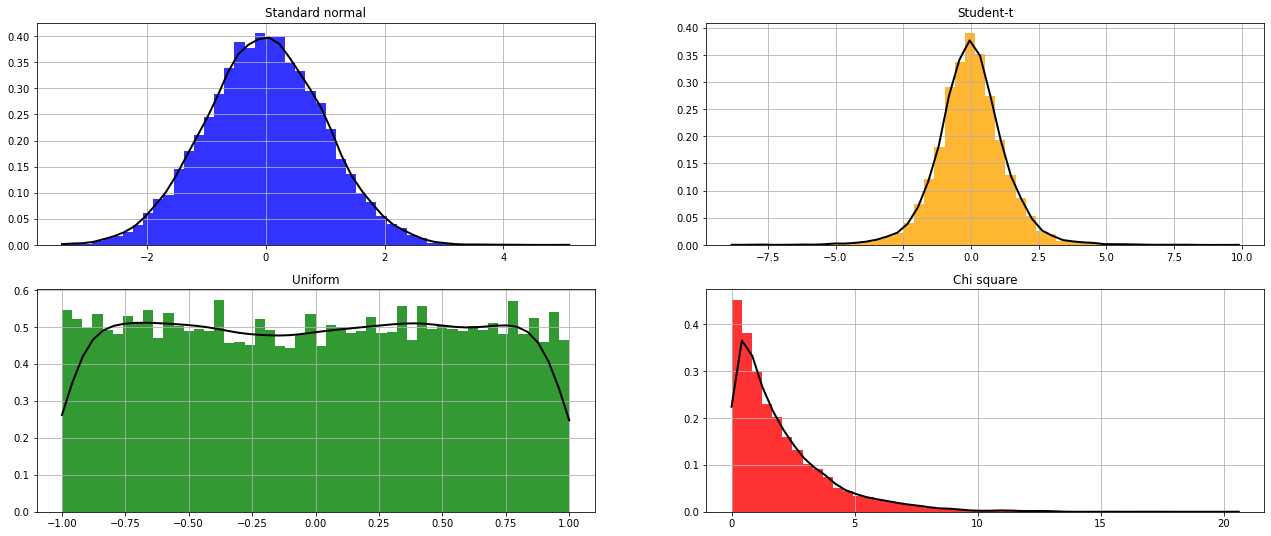

In [11]:
fig = plt.figure(figsize = (22,9))
plt.subplot(2,2,1)
plt.hist(norm, color = 'blue', bins = 50, density = True, alpha = 0.8)
plt.plot(xn, norm_density(xn), color = 'black', lw=2)
plt.title('Standard normal')
plt.grid(True)

plt.subplot(2,2,2)
plt.hist(t, color = 'orange', bins = 50, density = True, alpha = 0.8 )
plt.plot(xt, t_density(xt), color = 'black', lw=2)
plt.title('Student-t')
plt.grid(True)

plt.subplot(2,2,3)
plt.hist(unif, color = 'green', bins = 50, density = True, alpha = 0.8)
plt.plot(xu, unif_density(xu), color = 'black', lw=2)
plt.title('Uniform')
plt.grid(True)

plt.subplot(2,2,4)
plt.hist(chi, color = 'red', bins = 50, density = True, alpha = 0.8)
plt.plot(xch, chi_density(xch), color = 'black', lw=2)
plt.title('Chi square')
plt.grid(True)

Let's work with the standard normal variable. 

We know that a standard normal distribution has mean = 0 and standard deviation = 1. 

Let's calculate those moments using our generated data.

In [12]:
mu_hat = norm.mean()
sigma_hat = norm.std()

print("The sample mean is " + str(np.round(mu_hat,4)))
print("The sample standard deviation is " + str(np.round(sigma_hat,4)))

The sample mean is -0.0179
The sample standard deviation is 0.9931


If we had all the population data, then we would have the true mean and variance of the variable. 

Since we are only working with a portion of that population (the sample), we will always have some estimation error.

### Skewness and kurtosis

We can also generate distributions using *scipy.stats*. 

The module *skewnorm* allows us to create asymmetric distributions. 

It takes a real number as the asymmetric parameter. 

When that number equals zero, the distribution is normal.

In [13]:
from scipy.stats import skewnorm, t

skew_a = [-50, 0, 50]
x0 = skewnorm.rvs(skew_a[0], size=10000)
x1 = skewnorm.rvs(skew_a[1],size=10000)
x2 = skewnorm.rvs(skew_a[2], size=10000)

In [14]:
print('Simulating asymmetric distributions')
print(type(x1))
print(np.shape(x1))
print('-'*100)

Simulating asymmetric distributions
<class 'numpy.ndarray'>
(10000,)
----------------------------------------------------------------------------------------------------


''

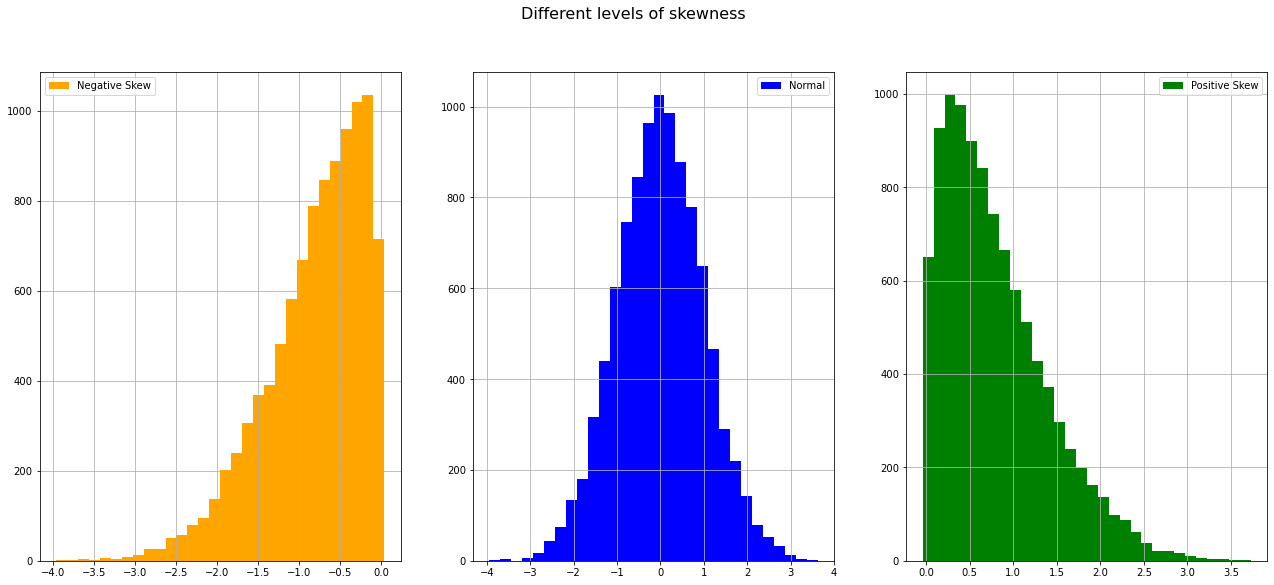

In [15]:
fig = plt.figure(figsize = (22,9))
fig.suptitle('Different levels of skewness', fontsize = 16)

plt.subplot(1,3,1)
plt.hist(x0, color = 'orange', label='Negative Skew', bins = 30)
plt.grid(True)
plt.legend(loc = 'upper left')

plt.subplot(1,3,2)
plt.hist(x1, color = 'blue', label='Normal', bins = 30)
plt.grid(True)
plt.legend(loc = 'best')

plt.subplot(1,3,3)
plt.hist(x2, color = 'green', label='Positive Skew', bins = 30)
plt.grid(True)
plt.legend(loc = 'upper right')

;

Let's now create distributions with different levels of kurtosis 

In [16]:
df = [5, 10, 200] 

y0 = t.rvs(df[0], size=10000, loc =0)
y1 = t.rvs(df[1], size=10000, loc =0)
y2 = t.rvs(df[2], size=10000, loc =0)

In [17]:
print('Simulating distributions with different levels of kurtosis')
print(type(y1))
print(np.shape(y1))
print('-'*100)

Simulating distributions with different levels of kurtosis
<class 'numpy.ndarray'>
(10000,)
----------------------------------------------------------------------------------------------------


''

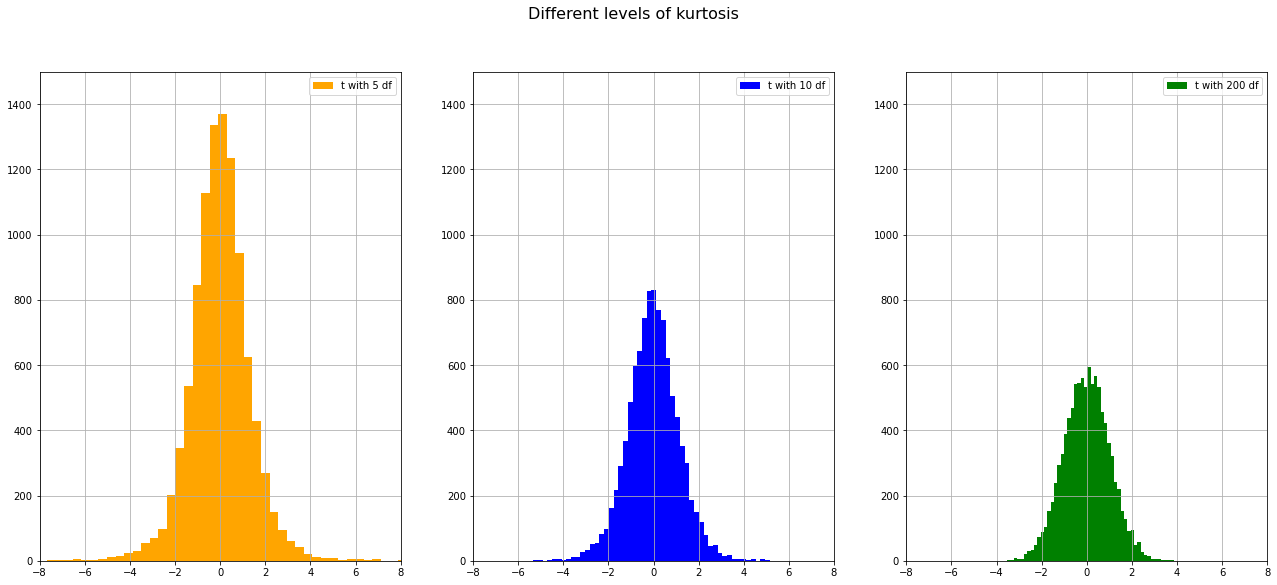

In [18]:
ylim = 1500
xlim = 8

fig = plt.figure(figsize = (22,9))
fig.suptitle('Different levels of kurtosis', fontsize = 16)

plt.subplot(1,3,1)
plt.hist(y0, color = 'orange', label='t with 5 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

plt.subplot(1,3,2)
plt.hist(y1, color = 'blue', label='t with 10 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

plt.subplot(1,3,3)
plt.hist(y2, color = 'green', label='t with 200 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

;

![title](img/fig_intro.png)

# Portfolio optimization: Modern Portfolio Theory

* * *

In 1952, Harry Markowitz proposed a normative model for selection of risky assets. 

The basic assumption was that inversors care about the **return** and **risk** of their portfolios. 

His great contribution was to define **return** as the mean of the probability distribution of assets returns and **risk** as the variance of that distribution.

By defining risk as variance, Markowitz was able to quantify precisely the gains of diversification: through diversification, risk can be reduced (though not eliminated) without changing the expected portfolio return.


## Basic theory

### The expected return on a portfolio

The return of a risky asset *j* will be defined as

$$ R_{j,t+1,s} = \dfrac{P_{j,t+1,s} - P_{j,t}}{P_{j,t}}$$

Where $P$ denotes the price of the asset, $t$ is the date in which the asset is bought, $t+1$ is the date in which the asset is sold and $s$ denote the state of nature.

For simplicity, we will asume that the return's distribution is discrete and $\pi_s$ is the probability of each state of the nature. Thus, its expectation equals:

$$E(R_{j,t+1}) = \sum_{s = 1}^S \pi_s R_{j,t+1,s}$$

Consider a portfolio consisting of N assets, and let $\omega_j$ be the weight of each asset in the cost of the portfolio, then the return of this portfolio is:

$$R_{p,t+1,s}  = \sum_{j=1}^N \omega_j R_{j,t+1,s}$$

That is, the return on a portfolio is a weithed average of the returns of the assets in the portfolio.

The portfolio's expected return is also the weigthed average of the asset expected returns:

$$E(R_p) = \sum_{j=1}^N\omega_jE(R_j)$$


### Measurement of risk and diversification

The variance of an asset return equals:

$$\sigma_j^2 = E [R_j - E(R_j)]^2 = \sum_{s=1}^S \pi_s [R_j - E(R_j)]^2$$


In order to understand how can a portfolio reduce its risk through diversification, let's asume we only have two assets. The variance of this two-assets portfolio is:

$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\sigma_{12}$$

$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\rho_{12}\sigma_1\sigma_2$$

Note that the variance of the portfolio depends on the correlation between the assets. We will explore how different correlations have a different impact on the variance of the portfolio and therefore in diversification gains.


The entire model is described by mean and variance of the assets. 

Therefore we are necessarily assuming that no other statistics are necessary to describe the distribution of end-of-period wealth. 

Since normal distribution is determined by mean and variance, if returns are normal distributed then we can fully describe the investment opportunity set. We will need to verify this condition and in case it doesn't hold we will have to assume so.

We define the **invesment opportunity set** as the pairs of mean and standard deviation that can be achived by inversing arbitrary amounts in the *N* risky assets. The **frontier** of the invesment opportunity set is defined as the set of portfolios with minimum variance among all portfolios with equal expected returns.


### Sharpe ratio

In order to be capable to compare between different investment choices, we need a risk-adjusted return measure. Sharpe ratio is defined as the excess portfolio return over the risk-free rate relative to its standard deviation:

$$ S = \dfrac{E(R_p) - R_f}{\sigma_p}$$

where $R_f$ is the risk free rate of the market.

### Matrix notation

For computational purposes it is much more useful to have a matrix representation of the above measures of the porfolio.

The expected return of the porfolio is:

$$E(R_p) = \omega' E(R)$$

where $E(R)$ is the vector containing the expected returns of all the assets and $\omega$ is the vector of weights.


The variance of the portfolio is:

$$\sigma_p^2 = \omega' \Sigma \omega$$

where $\Sigma$ is the covariance matrix of the returns:

$$ \Sigma =  \begin{bmatrix} \sigma_1^2 & \sigma_{1,2} & \dots & \sigma_{1,N}\\
\sigma_{2,1} & \sigma_{2}^2 & \dots & \sigma_{2,N}\\
\vdots & \vdots & \ddots & \vdots\\
\sigma_{N,1} & \sigma_{N,2} & \dots & \sigma_{N}^2
\end{bmatrix}$$

### Different correlations

Supose we have 2 normaly distributed assets.  We want to explore how a different correlation between them can generate different results in terms of diversification gains.

Recall the variance of the portfolio is


$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\rho_{12}\sigma_1\sigma_2$$

Let's asume for simplicity that both assets have the same variance. Then,

$$ \sigma^2_p = \left[1 - 2\omega(1 - \omega)(1 - \rho_{12})\right]\sigma^2$$

This allows as to visualize the reduction of the portfolio variance compared to the variance of the assets, i.e. diversification gains.



#### Case 1: Uncorrelated returns ($\rho =0$)

The maximum reduction in variance is achived when the inversment is equally split across securities ($\omega = 1/2$), which gives:

$$ \sigma^2_p = [1 - 2\omega(1 - \omega)]\sigma^2$$

$$\sigma^2_p = \left[1 - \dfrac{1}{2}\right]\sigma^2  = \dfrac{1}{2}\sigma^2$$

This means that by combining the two assets, variance can be reduced to half of individual variances. 

This makes sense if we think of what a zero correlation means. Think for instance of tossing a coin twice, where the outcome of each toss is independent of the other. 

If instead of betting everything on a single toss we split out money into two toss, some losses will be offset by gains on the other gamble, but we may still lose on boths. 

Risk is reduced but not eliminated.

We will set the same variances for both assets and equal to 1. This will imply that $\rho_{12} = \dfrac{cov_{12}}{var_1 var_2} = cov_{12}$. Let's also assume that the assets means are 1 and 2.

In [39]:
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

def portf_mean(w, mean):
    mu = w.dot(mean)
    return mu
    
def portf_var(w, cov_matrix):
    
    sigma = np.diagonal(w.dot(cov_matrix).dot(w.T))
    return sigma    

In [40]:
weights = np.zeros((500,2))
for i in range(len(weights)):
    weights[i] = rand_weights(2)

In [41]:
print(type(weights))
print(weights.shape)

<class 'numpy.ndarray'>
(500, 2)


In [52]:
var1 = 1
var2 = 1
var= [var1, var2]
mean = [1,2]

print(f'Variance: {var}')
print(f'Mean: {mean}')

Variance: [1, 1]
Mean: [1, 2]


Let's plot the results...

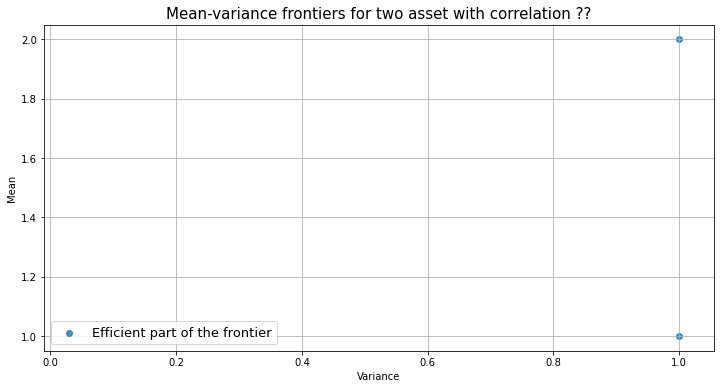

In [53]:
fig = plt.figure(figsize = (12,6))
plt.scatter(var, mean, marker='o',alpha = 0.8, label = 'Efficient part of the frontier')



plt.xlabel('Variance')
plt.ylabel('Mean')
plt.xlim(-0.01)
plt.legend(loc='lower left', fontsize = 13)
plt.title('Mean-variance frontiers for two asset with correlation ??', fontsize = 15)
plt.grid(True)

Python *zip() Function* https://www.w3schools.com/python/ref_func_zip.asp

We use zip(X, Y) to create an iterator that produces tuples of the form (x, y).

In [48]:
x = zip(mean, var)
list(x)

[(1, 1), (2, 1)]

In [49]:
first_names = ['Jane', 'John', 'Jennifer']
last_names = ['Doe', 'Williams', 'Smith']

for first, last in zip(first_names, last_names):
    print(first, last)

Jane Doe
John Williams
Jennifer Smith


In [50]:
first_names = ['Jane', 'John', 'Jennifer']
last_names = ['Doe', 'Williams', 'Smith']
ages = [20, 40, 30]

for first, last, age in zip(first_names, last_names, ages):
    print(f'{first} {last} is {age} years old')
    
print('-'*100)

Jane Doe is 20 years old
John Williams is 40 years old
Jennifer Smith is 30 years old
----------------------------------------------------------------------------------------------------


Let's create a function that plots the results

In [54]:
def mean_var_plot(mean, var, corr):
    fig = plt.figure(figsize = (22,9))              
    plt.scatter(var, mean, marker='o',alpha = 0.8, label = 'Efficient part of the frontier')
    
    if corr == 1:
        for mu, sigma in zip(mean, var):
            if mu < max(mean):
                plt.scatter(sigma, mu, color = 'tomato')
        plt.scatter(x= var[np.argmax(mean)], y = max(mean), 
                    lw = 8, label = 'Minimum variance achieved',  marker= "X", c ='gold', s=70)

    else:
        for mu, sigma in zip(mean, var):
            if mu < mean[np.argmin(var)]:
                plt.scatter(sigma, mu, color = 'tomato')
        plt.scatter(x= min(var), y = mean[np.argmin(var)], marker= "X",
                   lw = 8, label = 'Minimum variance achieved', c ='gold', s=70)                
            
    plt.xlabel('Variance')
    plt.ylabel('Mean')
    plt.xlim(-0.01)
    plt.legend(loc='lower left', fontsize = 13)
    plt.title('Mean-variance frontiers for two asset with correlation '+ str(corr), fontsize = 15)
    plt.grid(True)
    
    return

In [55]:
#Case 1
cov1 = 0
cov_matrix1 = np.asarray([[var1, cov1],
              [cov1, var2]])
case1 = multivariate_normal(mean, cov_matrix1, size = 100)
mean_p1= portf_mean(weights, mean)
var_p1 = portf_var(weights, cov_matrix1)

In [56]:
mean_p1[np.argmin(var_p1)]

1.5002072704788265

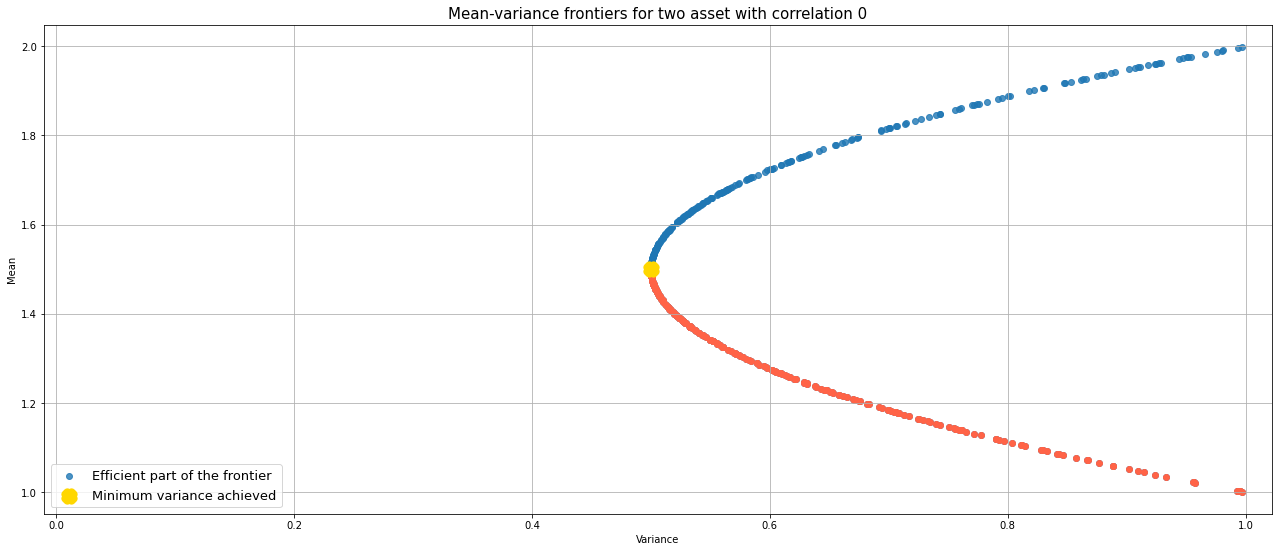

In [57]:
mean_var_plot(mean_p1, var_p1, corr = 0)

#### Case 2: Imperfectly positively correlated returns ($\rho =0.5$)

$$ \sigma^2_p = [1 - \omega(1 - \omega)]\sigma^2$$

Again, the maximum reduction in variance is achieved when the investment is equally split aross assets, but now:

$$ \sigma^2_p = \left[1 - \dfrac{1}{4}\right]\sigma^2 = \dfrac{3}{4}\sigma^2$$

Only a quarter of individual variance can be reduced. Losses are offset by gains but assets returns tend to move in the same direction, so such compensations across assets are less frequent.


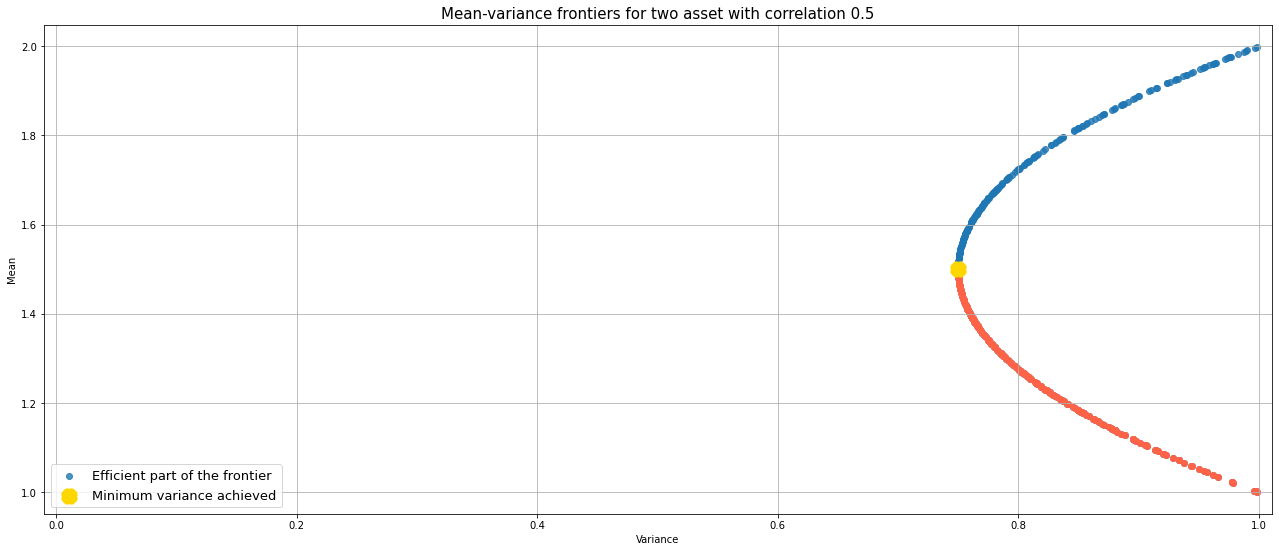

In [58]:
#Case 2
cov2 = 0.5
cov_matrix2 = [[var1, cov2],
              [cov2, var2]]
case2 = multivariate_normal(mean, cov_matrix2, size = 100)
mean_p2= portf_mean(weights, mean)
var_p2 = portf_var(weights,cov_matrix2)

mean_var_plot(mean_p2, var_p2, corr = 0.5)

#### Case 3: Perfectly positively correlated returns ($\rho = 1$)

$$ \sigma^2_p = [1 - 2\omega(1 - \omega)(1-1)]\sigma^2 = \sigma^2$$

Since assets always move in the same direction, there is no diversification gains.


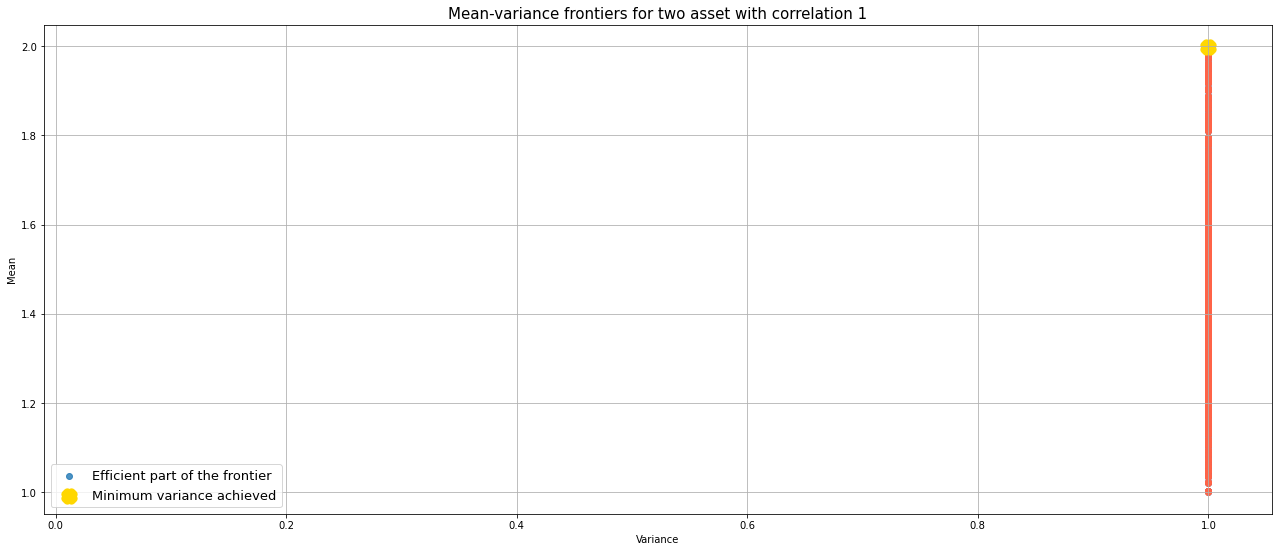

In [59]:
#Case 3
cov3 = 1
cov_matrix3 = [[var1, cov3],
              [cov3, var2]]
case3 = multivariate_normal(mean, cov_matrix3, size = 100)
mean_p3= portf_mean(weights, mean)
var_p3 = portf_var(weights, cov_matrix3)

mean_var_plot(mean_p3, var_p3, corr = 1)

#### Case 4: Imperfectly negatively correlated returns  ($\rho = -0.5$)

$$ \sigma^2_p = [1 - 3\omega(1 - \omega)]\sigma^2 $$

With $\omega = 1/2$:

$$ \sigma^2_p = \left[1 - \dfrac{3}{4}\right]\sigma^2 = \dfrac{1}{4}\sigma^2$$

Losses on one asset are offset by gains on the other. This happens more frequently than in the no correlation case, as asset returns tend to move in opposite directions.


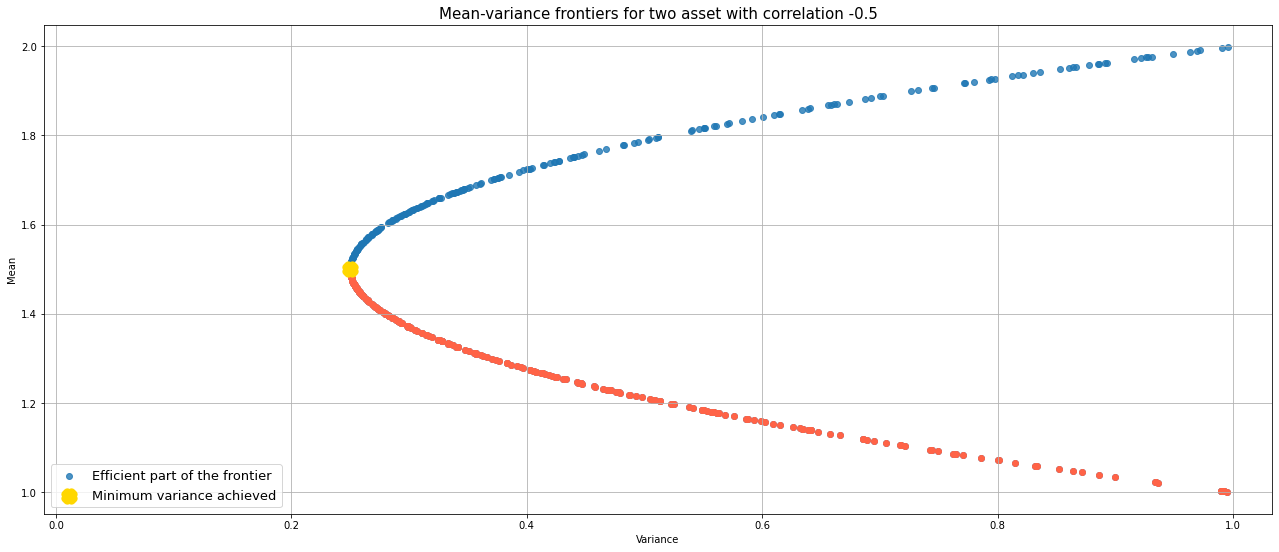

In [60]:
#Case 4
cov4 = -0.5
cov_matrix4 = [[var1, cov4],
              [cov4, var2]]
case4 = multivariate_normal(mean, cov_matrix4, size = 100)
mean_p4= portf_mean(weights, mean)
var_p4 = portf_var(weights, cov_matrix4)

mean_var_plot(mean_p4, var_p4, corr = -0.5)

#### Case 5: Perfectly negatively correlated returns ($\rho = -1$)

$$ \sigma^2_p = [1 - 4\omega(1 - \omega)(1-1)]\sigma^2$$

Setting $\omega = 1/2$ we get:

$$ \sigma^2_p = \left[1 - \dfrac{4}{4}\right]\sigma^2 = 0 $$

In this case losses are always compensated with gains so we can completely eliminate variance. Instead of risk diversification, we are actually talking about *risk hedging*. 

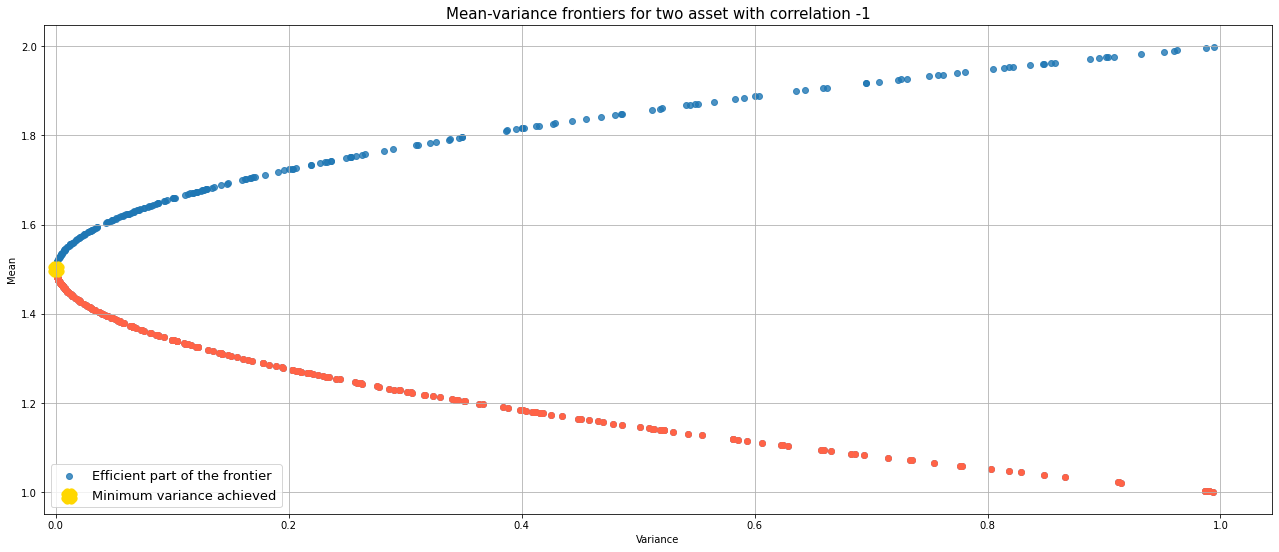

In [61]:
#Case 5
cov5 = -1
cov_matrix5 = [[var1, cov5],
              [cov5, var2]]
case5 = multivariate_normal(mean, cov_matrix5, size = 100)
mean_p5= portf_mean(weights, mean)
var_p5 = portf_var(weights, cov_matrix5)

mean_var_plot(mean_p5, var_p5, corr = -1)

Text(0.5, 1.0, 'Mean-variance frontiers for different correlations')

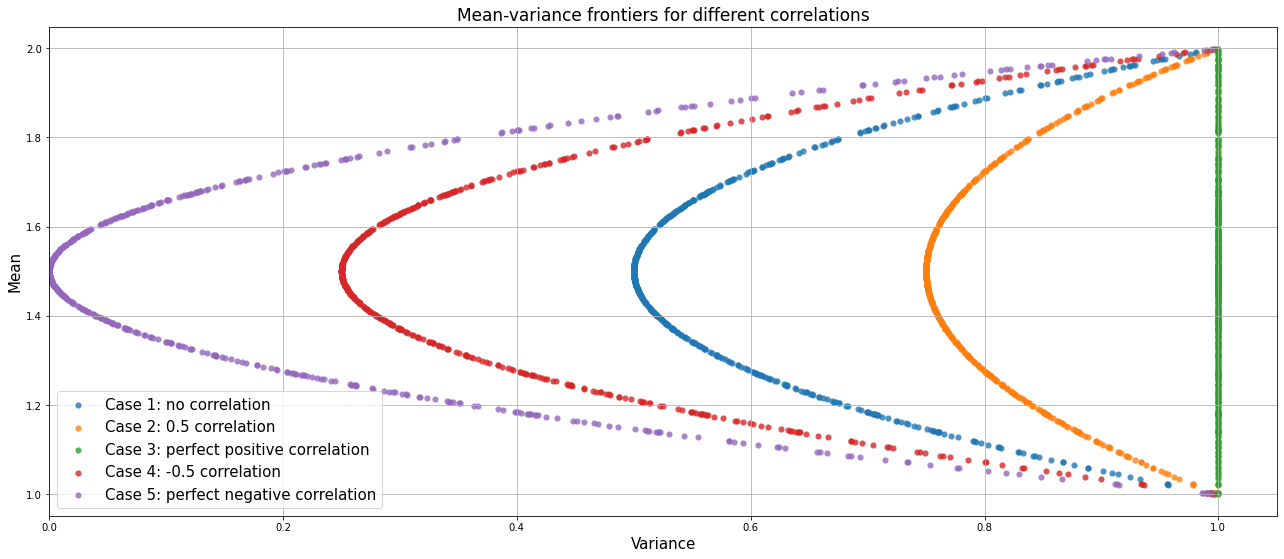

In [62]:
fig = plt.figure(figsize = (22,9))              
plt.scatter(var_p1, mean_p1, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 1: no correlation')
plt.scatter(var_p2, mean_p2, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 2: 0.5 correlation') 
plt.scatter(var_p3, mean_p3, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 3: perfect positive correlation') 
plt.scatter(var_p4, mean_p4, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 4: -0.5 correlation') 
plt.scatter(var_p5, mean_p5, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 5: perfect negative correlation') 

plt.xlabel('Variance', fontsize = 15)
plt.ylabel('Mean', fontsize = 15)
plt.xlim(0)
plt.legend(loc='lower left', fontsize = 15)
plt.grid(True)
plt.title('Mean-variance frontiers for different correlations', fontsize = 17)

In [63]:
def returns_plot(cov):
    cov_matrix = np.asarray([[1, cov],
              [cov, 1]])
    mean = [0,0]
    case = multivariate_normal(mean, cov_matrix, size = 1000)
    
    fig = plt.figure(figsize = (10,7))
    
    plt.scatter(x=case[:,0], y=case[:,1])
    plt.xlabel('Asset 1 returns')
    plt.ylabel('Asset 2 returns')
    plt.title('Scatter plot of assets returns with correlation '+ str(cov))
    plt.xlim(-4,4)
    plt.grid(True)
    
    return 

Correlation: .75


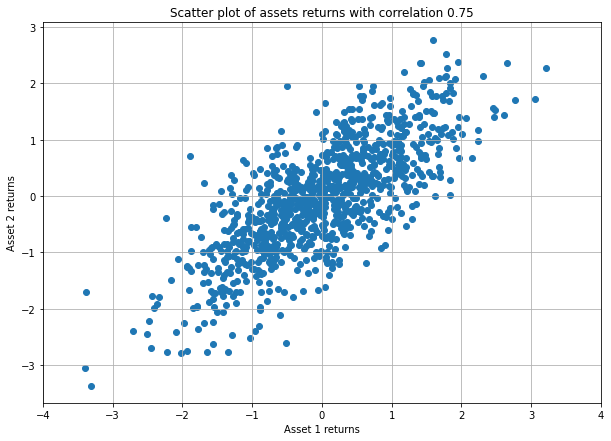

In [64]:
cor = float(input("Correlation: "))
if cor> 1 or cor< -1:
    print('Error! Correlation must be between -1 and 1')
else:
    returns_plot(cor)

Let's now add a third asset.

In [65]:
weights = np.zeros((2000,3))
for i in range(len(weights)):
    weights[i] = rand_weights(3)

In [66]:
noa = 3
n_obs = 10000

return_vec = np.random.randn(noa, n_obs)

In [67]:
return_vec.shape

(3, 10000)

In [68]:
np.mean(return_vec, axis = 1)

array([ 0.00038068, -0.0033518 ,  0.00331096])

In [69]:
np.cov(return_vec)

array([[ 0.98387994,  0.00131267, -0.0019808 ],
       [ 0.00131267,  1.00353494, -0.00142435],
       [-0.0019808 , -0.00142435,  0.99973074]])

In [73]:
pmean = portf_mean(weights, np.mean(return_vec, axis = 1))
pvar = portf_var(weights, np.cov(return_vec))

In [84]:
print('-'*100)
print(f' pmean type variable: {type(pmean)}, pmean Shape: {pmean.shape}')
print('-'*100)
print(f' pvar type variable: {type(pvar)}, pvar Shape: {pvar.shape}')
print('-'*100)

----------------------------------------------------------------------------------------------------
 pmean type variable: <class 'numpy.ndarray'>, pmean Shape: (2000,)
----------------------------------------------------------------------------------------------------
 pvar type variable: <class 'numpy.ndarray'>, pvar Shape: (2000,)
----------------------------------------------------------------------------------------------------


''

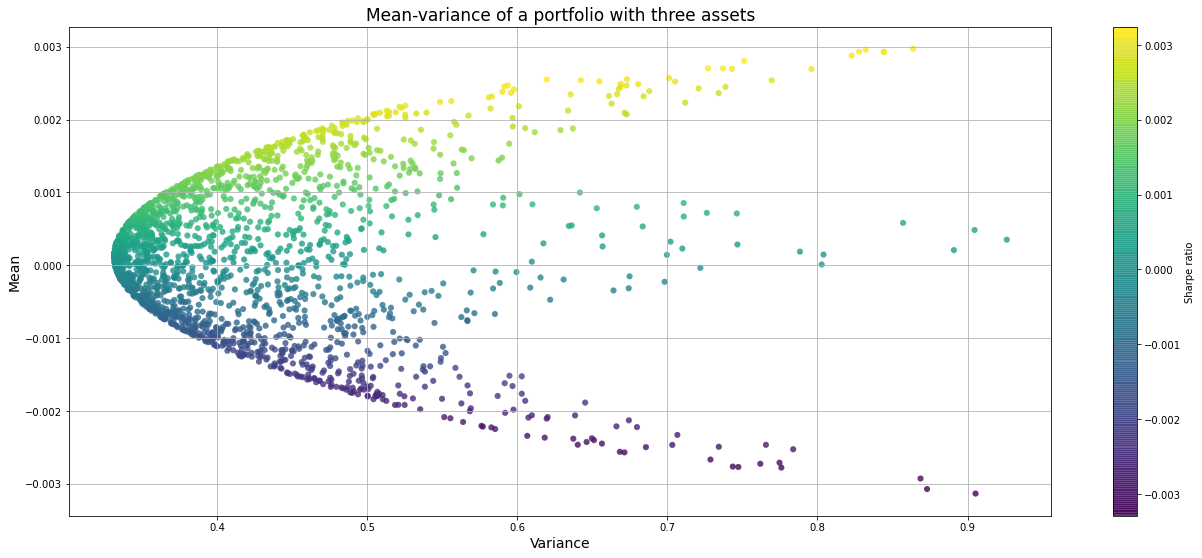

In [85]:
fig = plt.figure(figsize = (22,9))          
plt.scatter(pvar, pmean, marker='o', lw = 0.1, alpha = 0.8, c = pmean/np.sqrt(pvar))
plt.grid(True)
plt.title('Mean-variance of a portfolio with three assets', fontsize = 17)
plt.xlabel('Variance', fontsize = 14)
plt.ylabel('Mean', fontsize = 14)
plt.colorbar(label = 'Sharpe ratio')
;

The graph above shows that when we invest in the three assets simultaneously, not only do we have access to more combinations of mean and variance, but also to better combinations. By adding a third asset to the portfolio, we profit from further diversification gains.

When calculating the Shapre ratio we assume $R_f = 0$

## Efficient frontier

It is clear that not all weight distriburions perfom well when measured in terms of mean and variance. For example, for a fixed level of expected returns, say 0.04,  there are multiples portfolios that show different levels of risk. A rational investor would only be interested in the minimum risk given a fixed expected return, or the maximum return given a fixed risk level. This set of portfolios then makes up the so-called **efficient frontier**, which we will find now.

We will explain in detail the steps for finding the efficient frontier later.

In [89]:
tuple((0, 1) for x in range(noa))

((0, 1), (0, 1), (0, 1))

In [86]:
bnds = tuple((0, 1) for x in range(noa))

def min_func_port(w):
    return statistics(w)[1]

def statistics(weights):
    
    weights = np.array(weights) 
    pret = np.sum(np.mean(return_vec, axis = 1) * weights)
    pvol = np.dot(weights, np.dot(np.cov(return_vec), weights.T))
    
    return np.array([pret, pvol, pret / pvol])

trets = np.linspace(pmean.min(), pmean.max(), 100)
tvols = []

ef_we = []

for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}, 
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, [noa * [1. / noa,]], method='SLSQP',  
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
    ef_we.append(res['x'].round(3))
       
tvols = np.array(tvols)

ind = np.argmin(tvols)
tvols = tvols[ind:]
trets = trets[ind:]

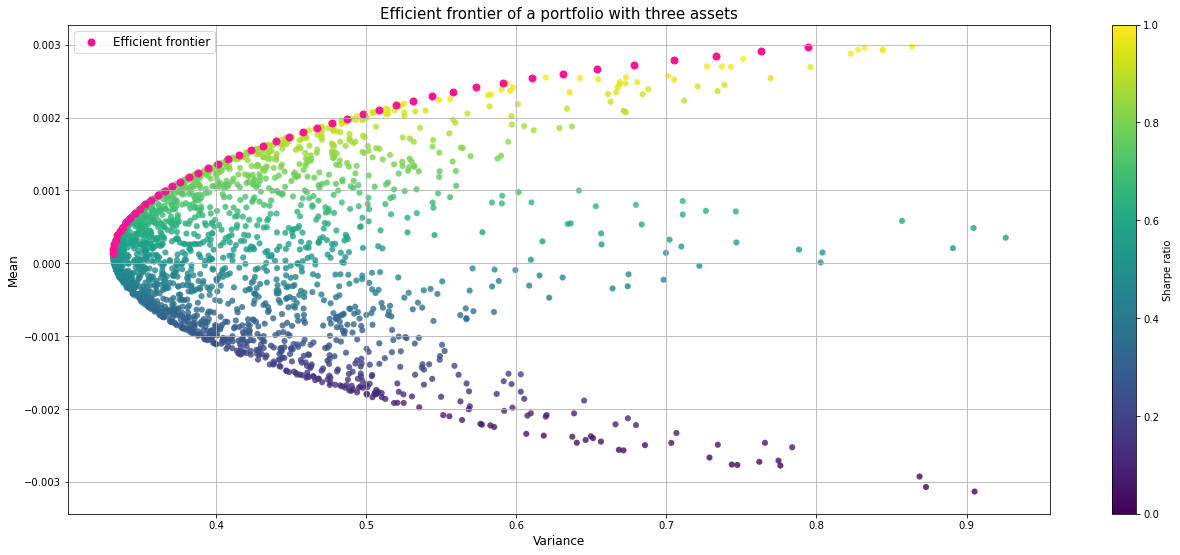

In [90]:
fig = plt.figure(figsize = (22,9))          
plt.scatter(pvar, pmean, marker='o', lw = 0.1, alpha = 0.8, c = pmean/np.sqrt(pvar))
plt.scatter(tvols, trets, c = 'deeppink', marker='o', label='Efficient frontier', lw = 2)
x = np.linspace(0.0, 5)

plt.grid(True)
plt.title('Efficient frontier of a portfolio with three assets', fontsize = 15)
plt.xlabel('Variance', fontsize = 12)
plt.ylabel('Mean', fontsize = 12)
plt.colorbar(label = 'Sharpe ratio')
plt.legend(loc='best', fontsize = 12)

## Real data

Let's apply the theory to some real assets.

We will use diferent funds to represent different kinds of investments: Gold, Treasury Bonds, Corporate Bonds, Stocks, Real Estate, Currencies.

In [91]:
tickers_funds =['IAU','TLH','LQD','HYG','^GSPC','EFA','EEM','VNQ','DX-Y.NYB','EURUSD=X']

data = pd.DataFrame(columns=tickers_funds)

for ticker in tickers_funds:
    data[ticker] = yf.download(ticker, period='10y')['Adj Close'] #https://pypi.org/project/yfinance/
    
tickers_labels = ['Gold','iShares US Treas 10y-20y','iShares IG Corp',
                  'iShares HY Corp','S&P 500','iShares MSCI EAFE','iShares MSCI EM',
                  'Vanguard Real Estate Index', 'US Dollar/USDX - Index','EURUSD=X']

data.columns = tickers_labels
data = data.dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [92]:
data.head()

Gold  iShares US Treas 10y-20y  iShares IG Corp  iShares HY Corp  \
Date                                                                            
2010-12-02  13.53                 91.840515        76.925331        50.521679   
2010-12-03  13.82                 91.697166        76.706978        50.606560   
2010-12-06  13.94                 92.477715        77.242294        50.578266   
2010-12-07  13.67                 90.773170        76.523842        50.838619   
2010-12-08  13.50                 89.952736        76.030807        50.674511   

                S&P 500  iShares MSCI EAFE  iShares MSCI EM  \
Date                                                          
2010-12-02  1221.530029          42.252926        38.150166   
2010-12-03  1224.709961          42.661633        38.288242   
2010-12-06  1223.119995          42.468414        38.223267   
2010-12-07  1223.750000          42.490719        38.044582   
2010-12-08  1228.280029          42.617046        37.800907   

            Vanguard Real Estate Index  US Dollar/USDX - Index  EURUSD=X  
Date                                                                      
2010-12-02                   36.679432               80.300003  1.312491  
2010-12-03                   36.672733               79.379997  1.321598  
2010-12-06                   36.746521               79.570000  1.341598  
2010-12-07                   36.827019               79.860001  1.328692  
2010-12-08                   36.283672               80.000000  1.324468

Since time series start at rather different absolute value, we can show them in direct comparision by normalizing them to a starting value of 100:

In [93]:
fig = px.line(data/ data.iloc[0] * 100)
fig.update_layout( title= "Last 10 years assets evolution",
            xaxis_title="Date",
            yaxis_title="Value",
            font=dict(
                family="Arial, monospace",
                size=12,
                color="black"
            ))
fig.show()

## Why using returns instead of prices?

Time series analysis requires a very important condition to hold: **stationarity**. We will not enter into a deep discussion about the concept, but what you should know is that this condition ensures that the parameters of the random variable under study do not change over time. Stationarity is so important because it enables one to make inference concerning futures observations.

Let's take a quick look at one of the above prices.

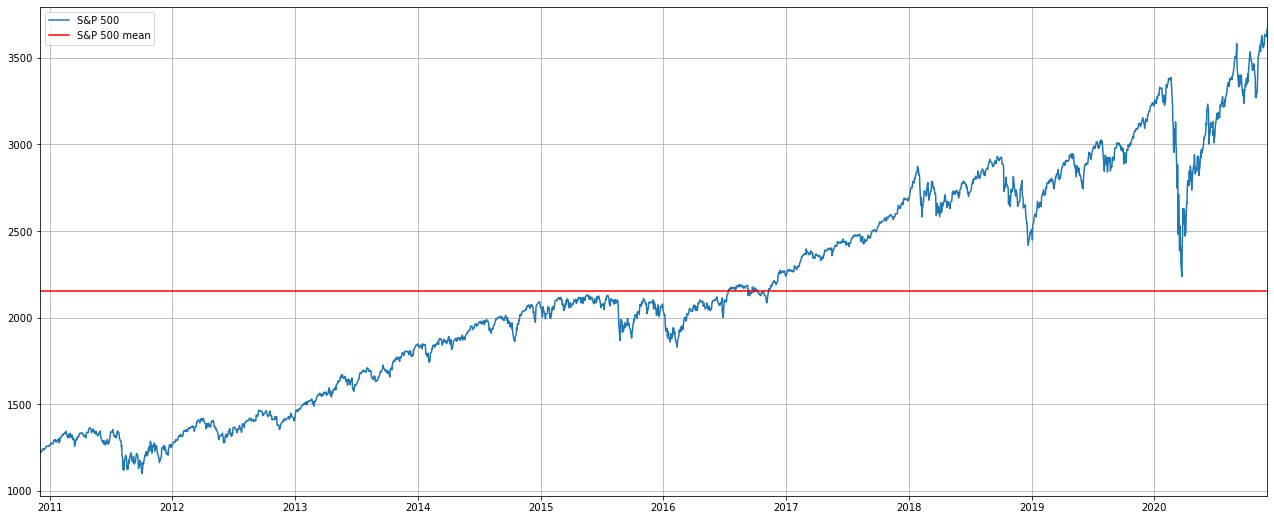

In [94]:
fig = plt.figure(figsize = (22,9))
plt.plot(data['S&P 500'], label = 'S&P 500')
plt.axhline(data['S&P 500'].mean(), label = 'S&P 500 mean', color= 'red')
plt.legend(loc = 'best')
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

Note that the mean does not look representative of all the data. This is so because prices are not stationary, and the lack of stationarity invalidates all statistical analysis.

How do we fix that? Using retuns.

We can calculate returns as  $\log (P_t / P_{t-1})$.

In [95]:
log_returns = np.log(data / data.shift(1))
log_returns = np.round(log_returns.dropna(),4)
log_returns

Gold  iShares US Treas 10y-20y  iShares IG Corp  \
Date                                                            
2010-12-03  0.0212                   -0.0016          -0.0028   
2010-12-06  0.0086                    0.0085           0.0070   
2010-12-07 -0.0196                   -0.0186          -0.0093   
2010-12-08 -0.0125                   -0.0091          -0.0065   
2010-12-09  0.0044                    0.0016           0.0024   
...            ...                       ...              ...   
2020-11-24 -0.0150                   -0.0066          -0.0023   
2020-11-25 -0.0006                   -0.0010           0.0006   
2020-11-30 -0.0164                    0.0049           0.0070   
2020-12-01  0.0199                   -0.0113          -0.0038   
2020-12-02  0.0089                   -0.0078          -0.0033   

            iShares HY Corp  S&P 500  iShares MSCI EAFE  iShares MSCI EM  \
Date                                                                       
2010-12-03           0.0017   0.0026             0.0096           0.0036   
2010-12-06          -0.0006  -0.0013            -0.0045          -0.0017   
2010-12-07           0.0051   0.0005             0.0005          -0.0047   
2010-12-08          -0.0032   0.0037             0.0030          -0.0064   
2010-12-09          -0.0021   0.0038             0.0026          -0.0034   
...                     ...      ...                ...              ...   
2020-11-24           0.0030   0.0160             0.0148           0.0133   
2020-11-25          -0.0005  -0.0016            -0.0013          -0.0056   
2020-11-30           0.0006  -0.0022            -0.0151          -0.0171   
2020-12-01           0.0026   0.0112             0.0232           0.0195   
2020-12-02           0.0038   0.0013             0.0001           0.0024   

            Vanguard Real Estate Index  US Dollar/USDX - Index  EURUSD=X  
Date                                                                      
2010-12-03                     -0.0002                 -0.0115    0.0069  
2010-12-06                      0.0020                  0.0024    0.0150  
2010-12-07                      0.0022                  0.0036   -0.0097  
2010-12-08                     -0.0149                  0.0018   -0.0032  
2010-12-09                     -0.0089                  0.0009    0.0005  
...                                ...                     ...       ...  
2020-11-24                      0.0053                 -0.0030   -0.0020  
2020-11-25                      0.0006                 -0.0026    0.0049  
2020-11-30                     -0.0150                 -0.0013    0.0059  
2020-12-01                      0.0128                 -0.0061   -0.0028  
2020-12-02                     -0.0060                 -0.0022    0.0135  

[2491 rows x 10 columns]

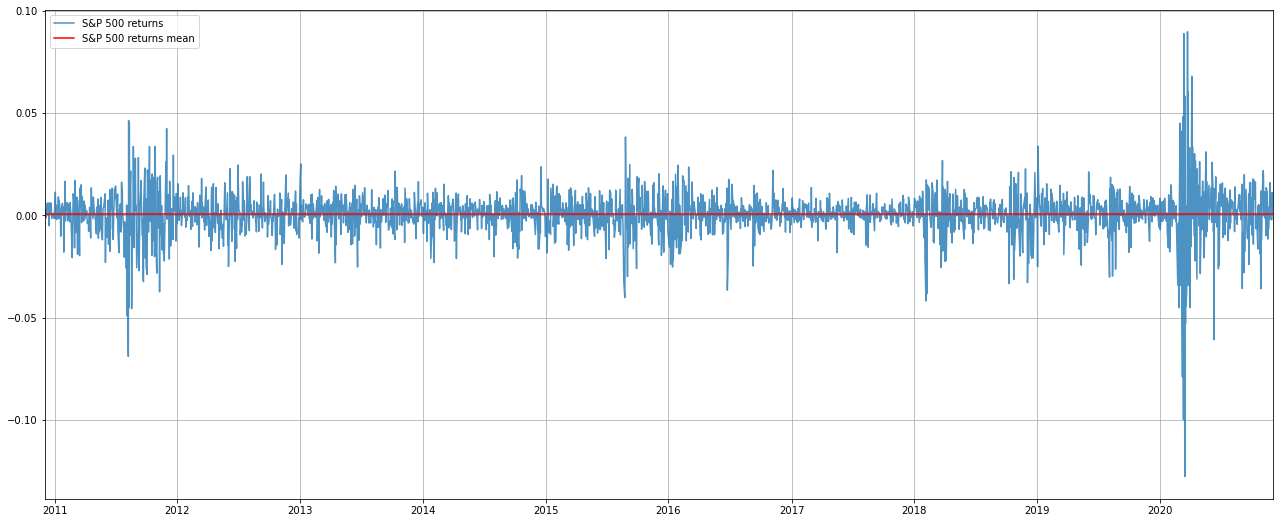

In [96]:
fig = plt.figure(figsize = (22,9))
plt.plot(log_returns['S&P 500'], label = 'S&P 500 returns', alpha = 0.8)
plt.axhline(log_returns['S&P 500'].mean(), label = 'S&P 500 returns mean', color= 'red')
plt.legend(loc = 'best')
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

Now it looks like it has a constant mean.

Besides, we can analyse if they can be considered as normally distributed by observing their histograms and some other statistics, particularly Skewness and Kurtosis.

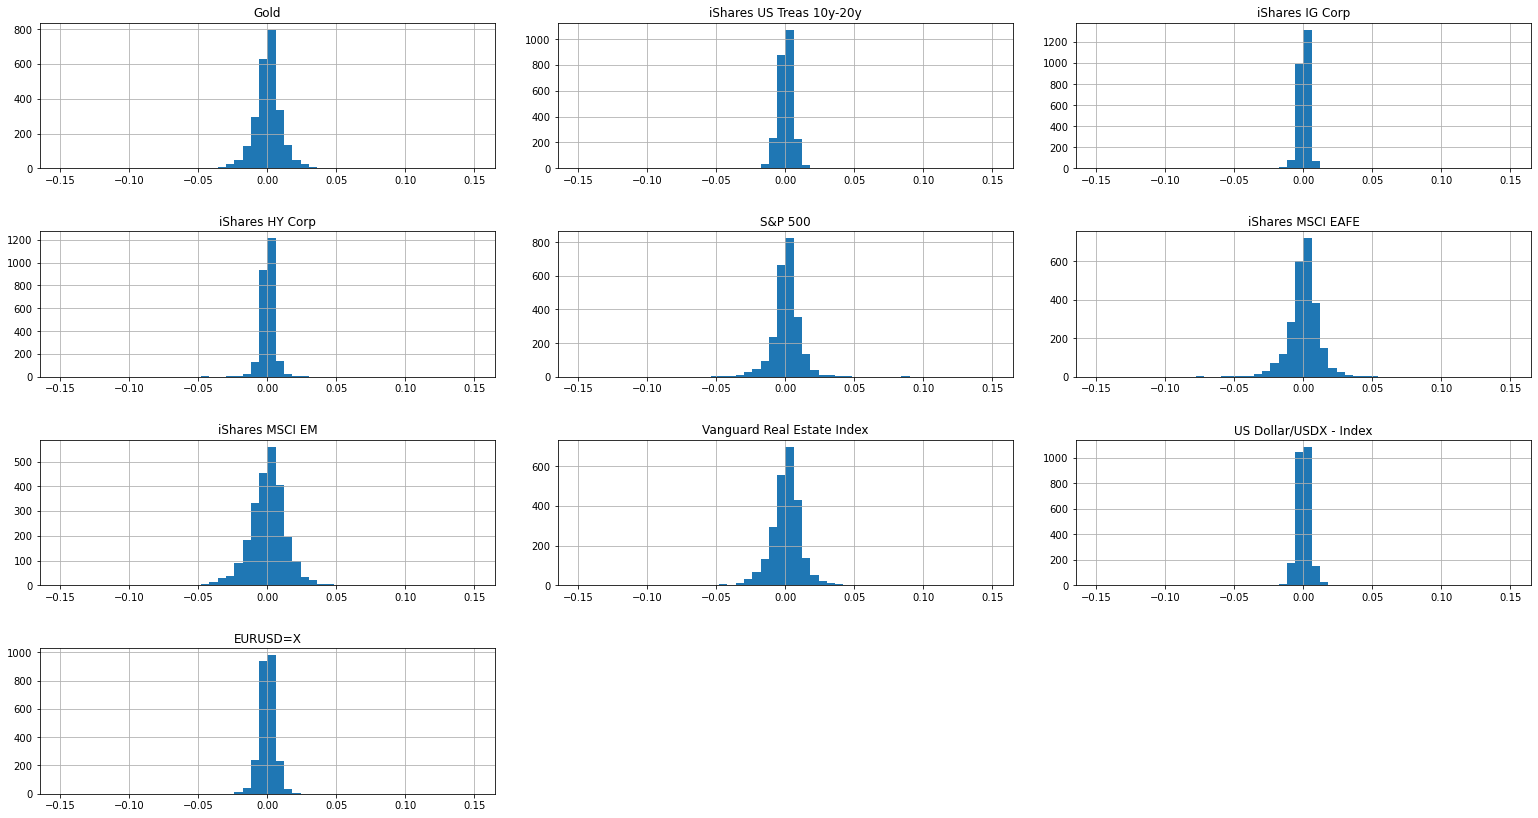

In [97]:
fig = plt.figure(figsize = (22,12))
for i in range(len(log_returns.columns)):
    plt.subplot(4,3,i+1)
    plt.hist(log_returns[log_returns.columns[i]], bins = 50, range = (-0.15, 0.15))
    plt.title(log_returns.columns[i])
    plt.grid(True)
plt.tight_layout(pad=3.0)

In [98]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray object to generate statistics on
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))
    
    
def normality_test(array):
    
    print("Skew of data set %14.3f" % scs.skew(array))
    print("Skew test p-value %14.3f" % scs.skewtest(array)[1])
    print("Kurt of data set %14.3f" % scs.kurtosis(array))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(array)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(array)[1])

In [99]:
for ticker in tickers_labels:
    print("\nResults for symbol %s" % ticker)
    print(30 * "-")
    log_data = np.array(log_returns[ticker])
    print_statistics(log_data)


Results for symbol Gold
------------------------------
     statistic           value
------------------------------
          size      2491.00000
           min        -0.09260
           max         0.04830
          mean         0.00010
           std         0.01000
          skew        -0.61991
      kurtosis         6.10051

Results for symbol iShares US Treas 10y-20y
------------------------------
     statistic           value
------------------------------
          size      2491.00000
           min        -0.05280
           max         0.04990
          mean         0.00022
           std         0.00568
          skew        -0.18065
      kurtosis        11.06624

Results for symbol iShares IG Corp
------------------------------
     statistic           value
------------------------------
          size      2491.00000
           min        -0.05130
           max         0.07130
          mean         0.00023
           std         0.00459
          skew         0.3

 The kurtosis values seem to be especially far from normal for all four data sets. We can also perform some normality tests.

In [100]:
for ticker in tickers_labels:
    print("\nResults for symbol %s" % ticker)
    print(30 * "-")
    log_data = np.array(log_returns[ticker])
    normality_test(log_data)


Results for symbol Gold
------------------------------
Skew of data set         -0.620
Skew test p-value          0.000
Kurt of data set          6.101
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol iShares US Treas 10y-20y
------------------------------
Skew of data set         -0.181
Skew test p-value          0.000
Kurt of data set         11.066
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol iShares IG Corp
------------------------------
Skew of data set          0.360
Skew test p-value          0.000
Kurt of data set         55.507
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol iShares HY Corp
------------------------------
Skew of data set         -0.272
Skew test p-value          0.000
Kurt of data set         24.268
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol S&P 500
------------------------------
Skew of data set       

 The above tests have normality as null hypothesis. Thus, normality is rejected for all of our data sets.

We can also study normality by generating normal random variables with mean and standard deviation equal to those of our sample data and comparing the theoretical distribution with the observed one.

Let's perform that excercise for the iShares HY Corp serie, which has a mean of 0.0002 and a standard deviation of 0.00546.

In [101]:
mu, sigma = 0.0002, 0.00546

HYCorp_normal = np.random.normal(mu, sigma, 2490)

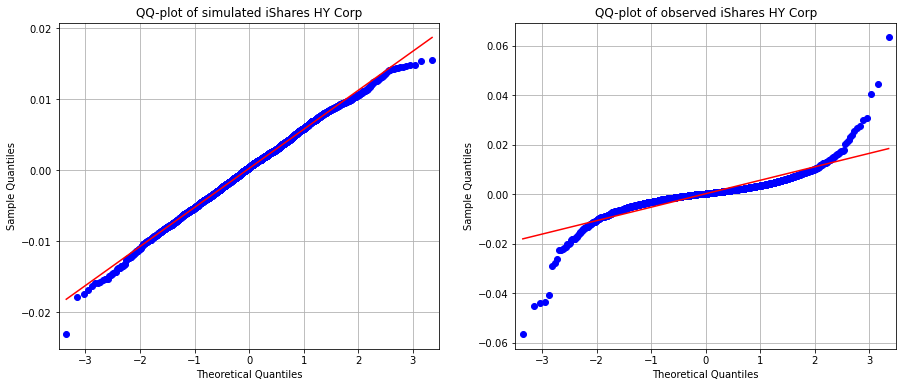

In [102]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1, 2, 1)

sm.qqplot(HYCorp_normal, line = 's', ax = ax)
plt.title('QQ-plot of simulated iShares HY Corp')
plt.grid(True)

ax = fig.add_subplot(1, 2, 2)
sm.qqplot(log_returns['iShares HY Corp'], line = 's', ax = ax)
plt.title('QQ-plot of observed iShares HY Corp')
plt.grid(True)

Text(0.5, 1.0, 'Histograms of simulated normal data and observed data')

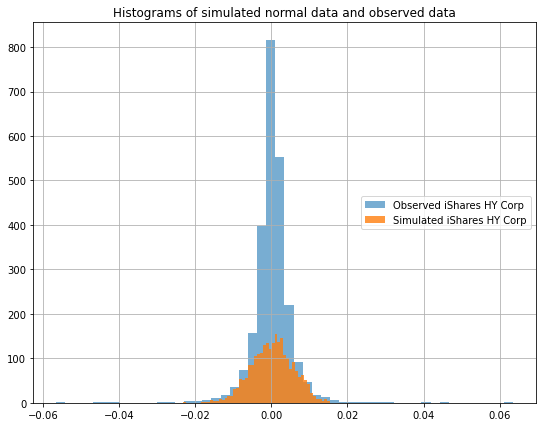

In [103]:
fig = plt.figure(figsize = (9,7))
plt.hist(log_returns['iShares HY Corp'], bins = 50,  label = 'Observed iShares HY Corp', alpha = 0.6)
plt.grid(True)
plt.hist(HYCorp_normal, bins = 50, label = 'Simulated iShares HY Corp', alpha = 0.8)
plt.grid(True)
plt.legend(loc = 'center right')
plt.title('Histograms of simulated normal data and observed data')

Even though normality does not hold, we will asume so in the rest of the analysis. Let's now generate the data we need.

In [104]:
noa = len(tickers_labels)
rets = np.log(data / data.shift(1)).dropna()
rets_mean= rets.mean() * 252
sigma = rets.cov() * 252

weights = rand_weights(noa)

In [105]:
weights = np.zeros((2000,noa))
for i in range(len(weights)):
    weights[i] = rand_weights(noa)
    
pret= portf_mean(weights, rets_mean)
pvol = np.sqrt(portf_var(weights, sigma))

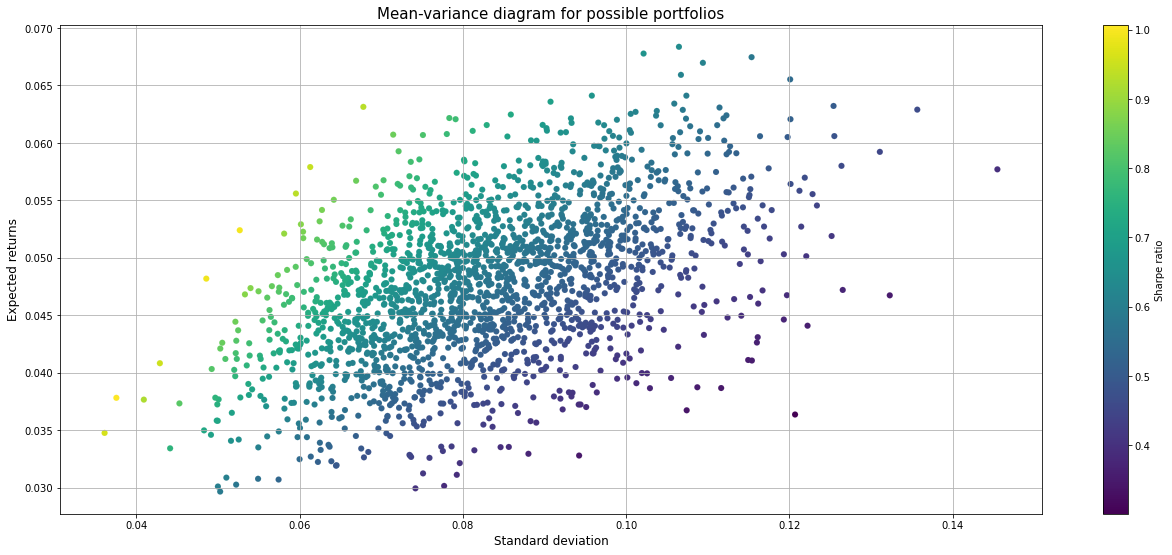

In [106]:
fig = plt.figure(figsize = (22,9))          
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol)
plt.grid(True)
plt.title('Mean-variance diagram for possible portfolios', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label = 'Sharpe ratio')

## Portfolio Optimizations

To make our lives a bit easier, first we have a convenience function giving back the major portfolio statistics for an input weights vector/array.

The derivation of the optimal portfolios is a constrained optimization problem for which  we  use  the  function  minimize  from  the  **scipy.optimize**  sublibrary.

In [107]:
def statistics(weights):
    
    weights = np.array(weights) 
    pret = np.sum(rets_mean * weights)
    pvol = np.sqrt(np.dot(weights.T, np.dot(sigma, weights)))
    
    return np.array([pret, pvol, pret / pvol])

The minimization function minimize is quite general and allows for (in)equality constraints and bounds for the parameters. Let us start with the maximization of the Sharpe ratio. Formally, we minimize the negative value of the Sharpe ratio:

In [108]:
def min_func_sharpe(weights):    
    return -statistics(weights)[2]

The constraint is that all parameters (weights) add up to 1. This can be formulated as follows using the conventions of the  minimize function

In [109]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

We also bound the parameter values (weights) to be within 0 and 1. These values are provided to the minimization function as a tuple of tuples in this case:

In [111]:
bnds = tuple((0, 1) for x in range(noa))

The only input that is missing for a call of the optimization function is a starting parameter list (initial guesses for the weights). We simply use an equal distribution.

Calling the function returns not only optimal parameter values, but much more. We store the results in an object we call opts.

In [112]:
opts = sco.minimize(min_func_sharpe, noa * [1. / noa], method='SLSQP',bounds=bnds, constraints=cons)
print(opts)

     fun: -1.2876719231727896
     jac: array([ 2.17556953e-06, -2.51829624e-05,  2.08039880e-02,  3.99202108e-05,
        4.84287739e-05,  7.63250589e-01,  1.94251010e+00,  1.15931143e+00,
       -1.43349171e-05,  1.07021093e-01])
 message: 'Optimization terminated successfully'
    nfev: 125
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([5.49560995e-04, 4.64991480e-01, 1.52105299e-17, 1.22504007e-01,
       2.03459343e-01, 7.03984920e-17, 2.54139064e-16, 1.71077101e-16,
       2.08495609e-01, 8.79732275e-17])


Our main interest lies in getting the optimal portfolio composition. To this end, we access the results object by providing the key of interest—i.e., x in our case. The optimization yields a portfolio that only consists of three out of the five assets:

In [113]:
print(tickers_labels)
opts['x'].round(3)

['Gold', 'iShares US Treas 10y-20y', 'iShares IG Corp', 'iShares HY Corp', 'S&P 500', 'iShares MSCI EAFE', 'iShares MSCI EM', 'Vanguard Real Estate Index', 'US Dollar/USDX - Index', 'EURUSD=X']


array([0.001, 0.465, 0.   , 0.123, 0.203, 0.   , 0.   , 0.   , 0.208,
       0.   ])

Using the portfolio weights from the optimization, the following statistics emerge:

In [114]:
statistics(opts['x']).round(3)

array([0.058, 0.045, 1.288])

Next, let us minimize the variance of the portfolio.

In [115]:
def min_func_variance(weights):    
    return statistics(weights)[1]**2

In [116]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,],method='SLSQP', bounds=bnds,constraints=cons)
print(tickers_labels)
optv['x'].round(3)

['Gold', 'iShares US Treas 10y-20y', 'iShares IG Corp', 'iShares HY Corp', 'S&P 500', 'iShares MSCI EAFE', 'iShares MSCI EM', 'Vanguard Real Estate Index', 'US Dollar/USDX - Index', 'EURUSD=X']


array([0.067, 0.168, 0.033, 0.133, 0.   , 0.061, 0.   , 0.   , 0.393,
       0.145])

We can further add two other possible portfolios: a risky one (Equity Mixed), and a more conservative one (Fixed Income Mixed)

In [117]:
print(tickers_labels)
w = np.array([0.00, 0.00, 0.00, 0.00, 0.34, 0.33, 0.33, 0.00, 0.00, 0.00])
w1 = np.array([0.00, 0.34, 0.33, 0.33, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00])
print(np.sum(w))
print(np.sum(w1))

ms_prets = np.sum(rets.mean() * w) * 252
ms_prets1 = np.sum(rets.mean() * w1) * 252

ms_vols = np.sqrt(np.dot(w.T, np.dot(rets.cov() * 252, w)))
ms_vols1 = np.sqrt(np.dot(w1.T, np.dot(rets.cov() * 252, w1)))

['Gold', 'iShares US Treas 10y-20y', 'iShares IG Corp', 'iShares HY Corp', 'S&P 500', 'iShares MSCI EAFE', 'iShares MSCI EM', 'Vanguard Real Estate Index', 'US Dollar/USDX - Index', 'EURUSD=X']
1.0
1.0


## Efficient frontier

The derivation of all optimal portfolios—i.e., all portfolios with minimum volatility for a given target return level (or all portfolios with maximum return for a given risk level)
—is similar to the previous optimizations. The only difference is that we have to iterate over multiple starting conditions. The approach we take is that we fix a target return
level and derive for each such level those portfolio weights that lead to the minimum volatility value. For the optimization, this leads to two conditions: one for the target
return level  tret and one for the sum of the portfolio weights as before. The boundary values for each parameter stay the same.

For clarity, we define a dedicated function min_func for use in the minimization procedure. It merely returns the volatility value from the  statistics function.

In [118]:
con1 = {'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}
con2 = {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}
bnds = tuple((0, 1) for x in range(noa))

def min_func_port(w):
    return statistics(w)[1]

In [119]:
trets = np.linspace(0.0025, 0.105, 100)
tvols = []

ef_we = []

for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}, {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',  bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
    ef_we.append(res['x'].round(3))
       
tvols = np.array(tvols)

ind = np.argmin(tvols)
tvols = tvols[ind:]
trets = trets[ind:]

In [120]:
ef_w = pd.DataFrame(ef_we,columns=tickers_labels)

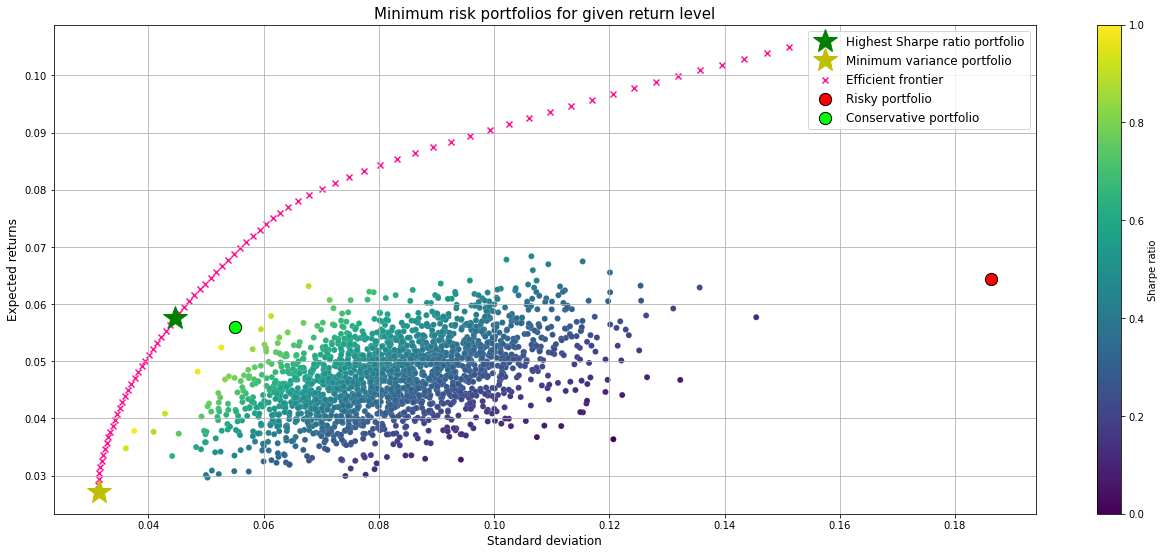

In [121]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol, edgecolors='w')

# efficient frontier
plt.scatter(tvols, trets, c = 'deeppink', marker='x', label='Efficient frontier', edgecolors='black')

# portfolio with highest Sharpe ratio

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'g*', markersize=25.0, label='Highest Sharpe ratio portfolio')

# minimum variance portfolio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],'y*', markersize=25.0, label='Minimum variance portfolio')


plt.scatter(ms_vols, ms_prets, c='red', s=150, marker='o',label='Risky portfolio', edgecolors='black')
plt.scatter(ms_vols1, ms_prets1, c='lime', s=150, marker='o',label='Conservative portfolio', edgecolors='black')

plt.grid(True)
plt.title('Minimum risk portfolios for given return level', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=12, loc = 'best')

Note that the point cloud does not aproach much to the efficient frontier. That's because the optimal weights that generate the frontier are extreme weights, i.e. combination of only few assets. This is hardly randomly generated. Thus, we are gonna create those extreme weights in order to expand the point cloud.

In [122]:
def extreme_weights(noa):
    
    ew = rand_weights(noa)*np.random.randint(2, size=(noa))
    np.seterr(divide='ignore', invalid='ignore')
    return ew / sum(ew)

In [123]:
ex_weights = np.zeros((10000,noa))
for i in range(len(ex_weights)):
    ex_weights[i] = extreme_weights(noa)

In [124]:
new_weights = np.concatenate((weights, ex_weights, np.identity(noa), ef_we))

In [125]:
pret= portf_mean(new_weights, rets_mean)
pvol = np.sqrt(portf_var(new_weights, sigma))

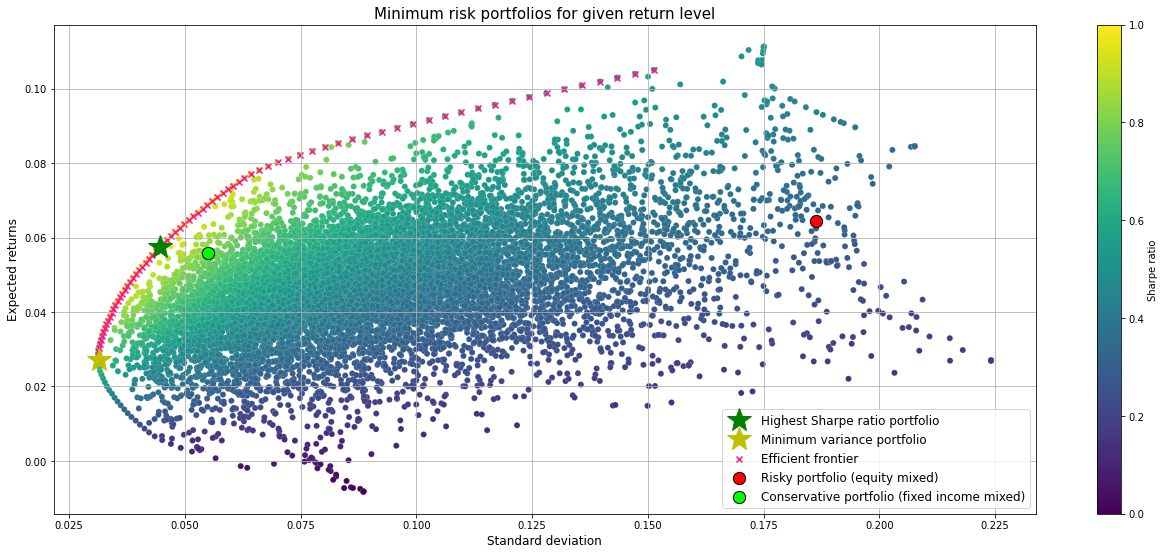

In [126]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol, edgecolors='w')

# efficient frontier
plt.scatter(tvols, trets, c = 'deeppink', marker='x', label='Efficient frontier', edgecolors='black')

# portfolio with highest Sharpe ratio

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'g*', markersize=25.0, label='Highest Sharpe ratio portfolio')

# minimum variance portfolio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],'y*', markersize=25.0, label='Minimum variance portfolio')


plt.scatter(ms_vols, ms_prets, c='red', s=150, marker='o',label='Risky portfolio (equity mixed)', edgecolors='black')
plt.scatter(ms_vols1, ms_prets1, c='lime', s=150, marker='o',label='Conservative portfolio (fixed income mixed)', edgecolors='black')

plt.grid(True)
plt.title('Minimum risk portfolios for given return level', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=12, loc = 'lower right')

## Capital Market Line

In addition to risky securities like stocks or commodities, there is in general one universal riskless investment opportunity available: cash or cash accounts.
In an idealized world, money held in a cash account with a large bank can be considered riskless (e.g., through public deposit insurance schemes). The downside is that such a riskless investment generally yields only a small return, sometimes close to zero.

However, taking into account such a riskless asset enhances the efficient investment opportunity set for investors considerably. The basic idea is that investors first determine an efficient portfolio of risky assets and then add the riskless asset to the mix. By adjusting the proportion of the investor’s wealth to be invested in the riskless asset it is possible to achieve any risk-return profile that lies on the straight line (in the risk-return space) between the riskless asset and the efficient portfolio.

Let's now assume that the investors porfolio is formed with a proportion $p$ of risky assets which yields a return $R_x$ and $(1-p)$ of the riskless asset whose return $R_f$ is not a random variable. The new porfolio characteristics will then be:

$$ R_p = pR_x + (1 - p)R_f $$

$$ E(R_p) = p E(R_x) + (1-p)R_f = R_f + (E(R_x) - R_f)p$$

$$ \sigma^2_p = p^2\sigma^2_x$$

Thus the market line will be:

$$ E(R_p) = R_f +\dfrac{(E(R_x) -R_f)}{\sigma_p}\sigma_x$$
$$ E(R_p) = R_f +S_p \sigma_x$$

The investor may combine the risk-free asset with any portfolio of risky asset available, which gives rise to many straight lines in the mean-variance diagram. But among all the efficient portfolios, all investor will choose one that achieves the best mean-variance pair, that is the **tangency porfolio**. That portfolio is the one that maximizes the Sharpe Ratio.

In order to find the market line we need to carry a spline interpolation of the efficient frontier. The following code selects exactly these portfolios from our previously used sets tvols and trets.

In [127]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

The new ndarray objects *evols* and *erets* are used for the interpolation:

In [128]:
tck = sci.splrep(evols, erets)

Via this numerical route we end up being able to define a continuos function f(x) for the efficient frontier:

In [129]:
def g(x):
    '''Efficient frontier function (splines approximation)'''
    return sci.splev(x, tck, der = 0)

In [130]:
Rf = 0.01

Sp = []
for sigma, mu in zip(evols, g(evols)):
     Sp.append((mu - Rf)/sigma)

In [131]:
sigma_T = np.linspace(0.0, 0.10)
E_T = Rf + max(Sp)*sigma_T

TP = np.argmax((g(evols)-Rf)/evols)

Text(0.5, 1.0, 'Capital market line and tangency portfolio')

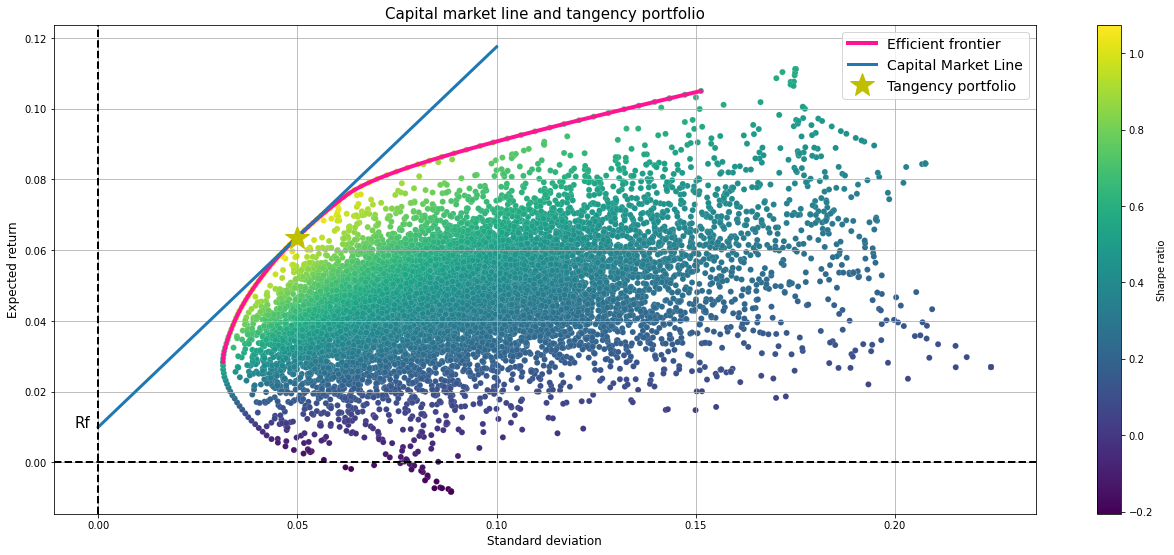

In [132]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = (pret-Rf)/pvol, edgecolors='w')

# efficient frontier
plt.plot(evols, erets, 'deeppink', lw=4, label='Efficient frontier')

# capital market line
plt.plot(sigma_T, E_T, lw = 3, label= 'Capital Market Line')

# tangency portfolio
plt.plot(evols[TP], erets[TP], 'y*', markersize=25.0, label='Tangency portfolio')

# risk free rate
plt.text(-0.006, Rf, 'Rf', fontsize = 15)

plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected return', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=14)
plt.title('Capital market line and tangency portfolio', fontsize = 15)

The portfolio weights of the tangent portfolio are as follows. 

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - erets[TP]}, 
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',bounds=bnds, constraints=cons)

In [133]:
keys = tickers_labels
values = res['x'].round(4)
res = {keys[i]: values[i] for i in range(len(keys))} 
res

{'Gold': 0.0,
 'iShares US Treas 10y-20y': 0.1103,
 'iShares IG Corp': 0.0,
 'iShares HY Corp': 0.0,
 'S&P 500': 0.8897,
 'iShares MSCI EAFE': 0.0,
 'iShares MSCI EM': 0.0,
 'Vanguard Real Estate Index': 0.0,
 'US Dollar/USDX - Index': 0.0,
 'EURUSD=X': 0.0}